# Air Quality Analysis Project 
#### The objective of this project is to analyze air quality levels in New York City and evaluate their potential impact on public health outcomes. This involves handling data preprocessing tasks, exploring the dataset through various visualizations, and ultimately setting up a foundation for predictive modeling on air quality data.

Step : Import Libraries
The first step involves importing essential Python libraries. These libraries are:

pandas and numpy for data manipulation and numerical operations.
seaborn and matplotlib.pyplot for visualizations.
scikit-learn modules for data preprocessing, model training, and evaluation.

### Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset
In this step, we load the air quality data by using the dataset file.


In [2]:
df= pd.read_csv("C:\\Users\\GOKUL\\Downloads\\Air_Quality1.csv")

In [3]:
df.head(5)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN


In [4]:
df.tail(5)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9,NaN
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7,NaN
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4,NaN
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8,NaN
18024,151658,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,408.0,Jamaica,2005,01/01/2005,41.0,NaN


### Data Cleaning 

In [5]:
df.shape

(18025, 12)

In [6]:
df.columns

Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB


In [6]:
df.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value,Message
count,18025.000000,18025.000000,1.801600e+04,18025.000000,0.0
mean,426387.692705,434.830180,5.906303e+05,21.428616,NaN
std,250489.450630,115.852371,7.769549e+06,23.999345,NaN
min,121644.000000,365.000000,1.000000e+00,0.000000,NaN
25%,175303.000000,365.000000,2.020000e+02,8.900000,NaN
50%,410803.000000,375.000000,3.030000e+02,15.200000,NaN
75%,649893.000000,386.000000,4.040000e+02,26.700000,NaN
max,828353.000000,661.000000,1.051061e+08,424.700000,NaN


In [7]:
print(df.isnull().sum())  # Count of missing values per column

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64


In [8]:
# Step 4: Handle Missing Data
# Fill missing values in 'Geo Join ID' with median value and drop 'Message' column (all values are NaN)
df['Geo Join ID'].fillna(df['Geo Join ID'].median(), inplace=True)
df.drop(columns=['Message'], inplace=True)
df['Geo Place Name'].fillna('Unknown', inplace=True)


### Handle Missing Data and Duplicates

In [9]:
print(df.isnull().sum())

Unique ID         0
Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64


Geo Join ID: We replace missing values with the column's median.

Message: We drop this column if it has mostly null values.

In [10]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", df.shape)


Shape after dropping duplicates: (18025, 11)


In [11]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')

In [12]:
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,2015-01-01,0.3
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,2015-01-01,1.2
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,2011-12-01,8.6
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,2011-12-01,8.0
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,2022-06-01,6.1


### Handling Outliers
Outliers can distort the predictions of our model, so we use the Interquartile Range (IQR) method to detect and remove extreme outliers from the Data Value field. This process helps make the data more stable and reliable for model training

In [13]:
# Detect outliers using IQR
Q1 = df['Data Value'].quantile(0.25)
Q3 = df['Data Value'].quantile(0.75)
IQR = Q3 - Q1

# Filter data without extreme outliers
df = df[~((df['Data Value'] < (Q1 - 1.5 * IQR)) | (df['Data Value'] > (Q3 + 1.5 * IQR)))]
print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (17045, 11)


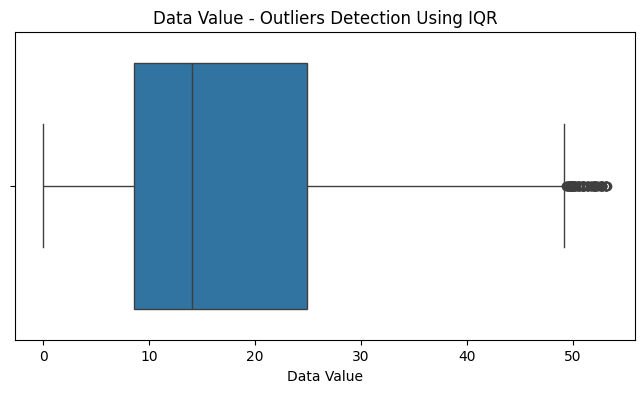

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to visualize outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Data Value'])
plt.title("Data Value - Outliers Detection Using IQR")
plt.show()


## Data Visualization

#### Hist plot

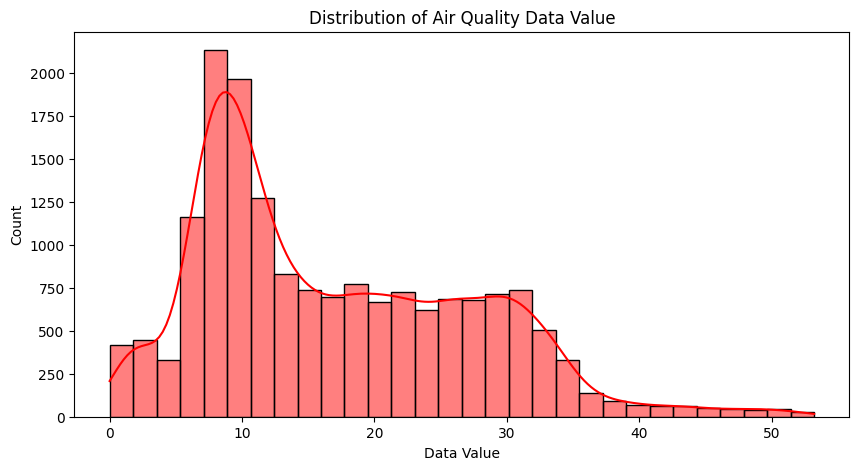

In [15]:
# Plot the distribution of the target variable (Data Value)
plt.figure(figsize=(10, 5))
sns.histplot(df['Data Value'], kde=True, bins=30,color='r')
plt.title("Distribution of Air Quality Data Value")
plt.show()


We plot a histogram of the target variable, Data Value, to visualize its distribution. This provides an overview of the air quality levels across different regions and times, helping identify any skewness or concentration of values.


#### Box Plot

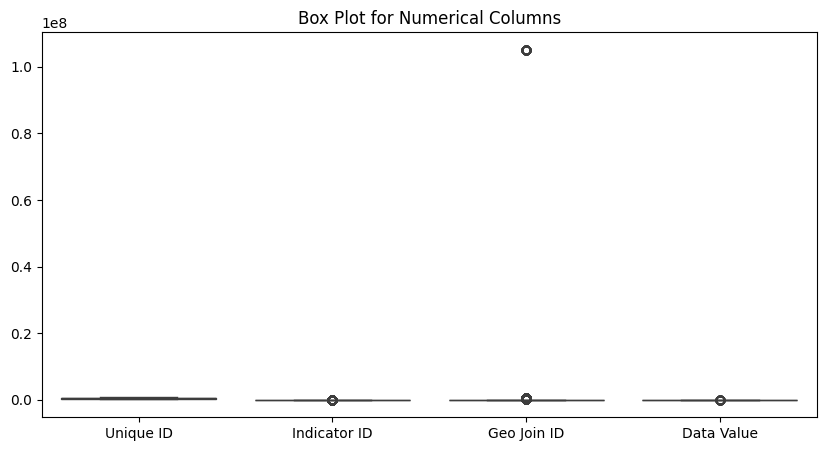

In [16]:
# Box plot to visualize potential outliers in numerical columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Box Plot for Numerical Columns")
plt.show()


This plot highlights outliers in each numerical column. Outliers can reveal unusual occurrences in air quality or indicator values, giving context to extreme pollution events or measurement errors.


#### Scatter Plot

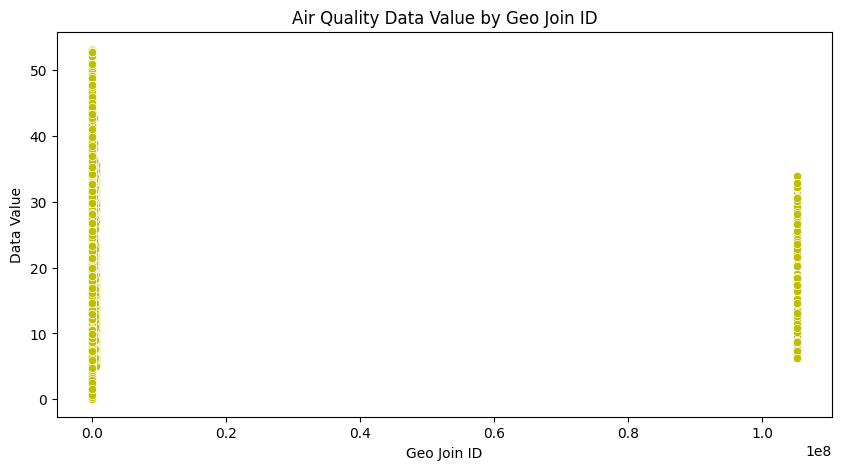

In [17]:
# Scatter plot of Geo Join ID vs Data Value 
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Geo Join ID', y='Data Value', data=df,color='y')
plt.title("Air Quality Data Value by Geo Join ID")
plt.show()


This scatter plot shows the relationship between Geo Join ID (likely a geographic identifier) and the air quality measure (Data Value).The plot is useful for identifying specific locations that may need targeted interventions due to consistently poor air quality.


#### Bar Plot

<function matplotlib.pyplot.show(close=None, block=None)>

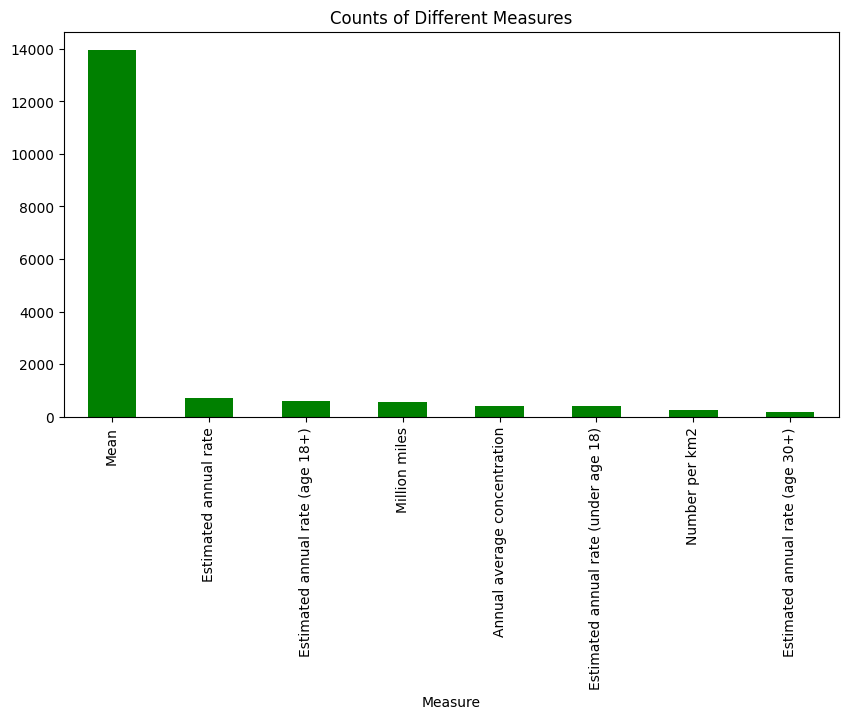

In [18]:
#Bar Plot for a Categorical Feature ( Measure)
plt.figure(figsize=(10, 5))
df['Measure'].value_counts().plot(kind='bar',color='g')
plt.title("Counts of Different Measures")
plt.show

This bar plot shows the frequency of each type of measurement recorded in the dataset.This plot helps us assess if data for certain measures might need augmentation or if analysis should focus on the more common measures.



#### Line Plot

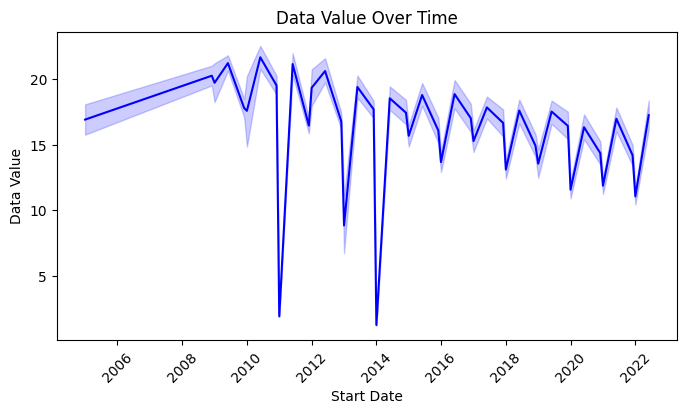

In [19]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='Start_Date', y='Data Value', data=df,color='blue')
plt.title('Data Value Over Time')
plt.xlabel('Start Date')
plt.ylabel('Data Value')
plt.xticks(rotation=45)
plt.show()


The plot shows how the "Data Value" changes over time, with each point on the line representing a specific date and its associated air quality measurement.This visualization is critical for trend analysis and forecasting, as it can reveal periods where air quality impacts public health.


#### Heatmap

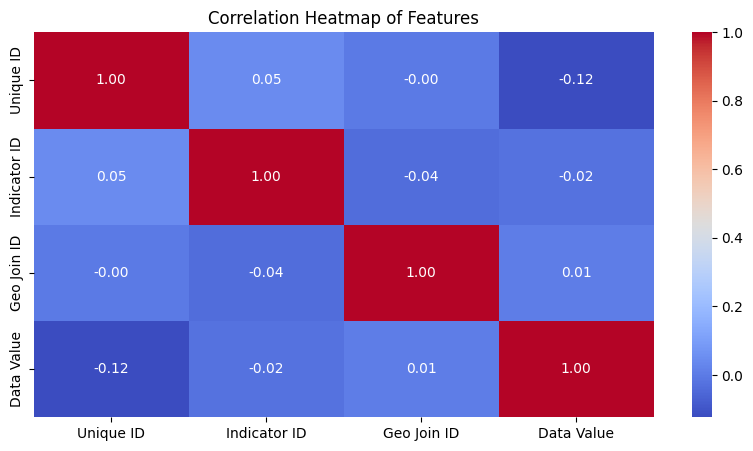

In [20]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

This heatmap displays correlation coefficients between numerical features.Strong correlations indicate which features are closely related, which can help in feature selection and understanding dependencies.


#### Encoding and Scaling Features
Before modeling, ensure that categorical features are encoded and numerical features are scaled.  A preprocessing pipeline to handle both.

In [21]:
target = 'Data Value'
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

#### Preprocessing Pipeline

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Preprocessing for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


#### Train-Test Split

In [23]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set size:", X_train.shape, ", Test set size:", X_test.shape)



Training set size: (13636, 10) , Test set size: (3409, 10)


In [43]:
 X_train.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date
17940,825962,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,202.0,Downtown - Heights - Slope,Winter 2021-22,2021-12-01
604,175262,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,207.0,East Flatbush - Flatbush,Winter 2008-09,2008-12-01
319,740922,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,203.0,Bedford Stuyvesant - Crown Heights,Annual Average 2021,2021-01-01
7924,176042,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,410.0,Rockaways,Summer 2012,2012-06-01
5442,121663,386,Ozone (O3),Mean,ppb,CD,208.0,Riverdale and Fieldston (CD8),2-Year Summer Average 2009-2010,2009-06-01
